In [1]:
%load_ext autoreload
%autoreload 2
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import processing_netcdf as pcdf
import matplotlib.pyplot as plt

In [43]:
shapefile = "/home/mlopez/EXEC/Shapefiles/DDE_STF_20K_REG_FOR_VUE_S.shp"

In [2]:
#opening and transfering data into an array
df = pcdf.load_as_df("/home/mlopez/EXEC/Processed Data Varibales/NorESM1-M_rcp45_tg_mean_annual.nc")

/exec/mlopez/Code/GitHub/processing_netcdf.py:24: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  index = ds.indexes['time'].to_datetimeindex()


In [3]:
df

tg_mean
lat       lon        time                  
66.623306 -89.045212 1950-01-01  260.484924
                     1951-01-01  259.078644
                     1952-01-01  258.677917
                     1953-01-01  257.989288
                     1954-01-01  259.059174
...                                     ...
40.041039 -74.045807 2096-01-01  287.475037
                     2097-01-01  288.044769
                     2098-01-01  286.913635
                     2099-01-01  288.436249
                     2100-01-01  287.527069

[11507106 rows x 1 columns]

In [4]:
dfC = df.copy()
dfC["tg_mean"] = dfC["tg_mean"] -273.15
dfC.head()

tg_mean
lat       lon        time                 
66.623306 -89.045212 1950-01-01 -12.665070
                     1951-01-01 -14.071350
                     1952-01-01 -14.472076
                     1953-01-01 -15.160706
                     1954-01-01 -14.090820

In [5]:
year_groups = {y:0 for y in range(1980,2011)}
year_groups.update({y:1 for y in range(2041,2071)})
year_groups.update({y:2 for y in range(2071,2101)})
dfC2 = dfC.reset_index()
dfp = dfC2.groupby([dfC2.time.dt.year.map(year_groups), "lat","lon"]).mean()
dfp

tg_mean
time lat       lon                  
0.0  40.041039 -89.045212  11.474038
               -88.961884  11.452959
               -88.878548  11.440704
               -88.795219  11.419402
               -88.711891  11.434692
...                              ...
2.0  66.623306 -61.629639  -6.771683
               -61.546310  -7.084950
               -61.462978  -6.876992
               -61.379650  -6.807693
               -61.296322  -6.205523

[228618 rows x 1 columns]

# Historic Period

In [6]:
df_h = dfp.query("time==0.0")
df_h.head()

tg_mean
time lat       lon                  
0.0  40.041039 -89.045212  11.474038
               -88.961884  11.452959
               -88.878548  11.440704
               -88.795219  11.419402
               -88.711891  11.434692

In [7]:
df_h = df_h.reset_index()

In [8]:
df_h["lon"]

0       -89.045212
1       -88.961884
2       -88.878548
3       -88.795219
4       -88.711891
           ...    
76201   -61.629639
76202   -61.546310
76203   -61.462978
76204   -61.379650
76205   -61.296322
Name: lon, Length: 76206, dtype: float64

No handles with labels found to put in legend.


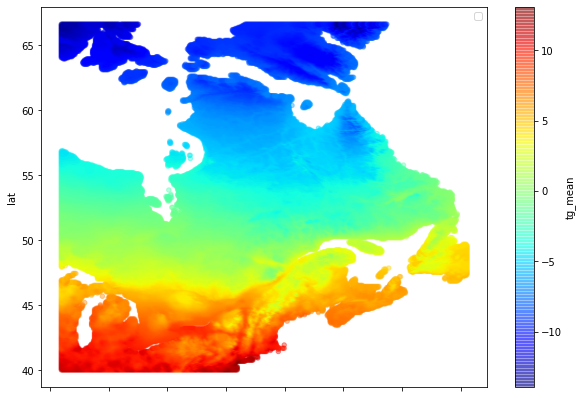

In [9]:
df_h.plot(kind="scatter", x="lon", y="lat",
    c="tg_mean", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

# Period 2040-2070

In [10]:
df2050 = dfp.query("time==1.0")
df2050 = df2050.reset_index()
df2050

,time,lat,lon,tg_mean
0,1.0,40.041039,-89.045212,13.880927
1,1.0,40.041039,-88.961884,13.860847
2,1.0,40.041039,-88.878548,13.849320
3,1.0,40.041039,-88.795219,13.825986
4,1.0,40.041039,-88.711891,13.843284
...,...,...,...,...
76201,1.0,66.623306,-61.629639,-7.526189
76202,1.0,66.623306,-61.546310,-7.831767
76203,1.0,66.623306,-61.462978,-7.619788
76204,1.0,66.623306,-61.379650,-7.545265


# Period 2071-20100

In [11]:
df2080 = dfp.query("time==2.0")
df2080 = df2080.reset_index()
df2080

,time,lat,lon,tg_mean
0,2.0,40.041039,-89.045212,14.543394
1,2.0,40.041039,-88.961884,14.523819
2,2.0,40.041039,-88.878548,14.512645
3,2.0,40.041039,-88.795219,14.490088
4,2.0,40.041039,-88.711891,14.509305
...,...,...,...,...
76201,2.0,66.623306,-61.629639,-6.771683
76202,2.0,66.623306,-61.546310,-7.084950
76203,2.0,66.623306,-61.462978,-6.876992
76204,2.0,66.623306,-61.379650,-6.807693


# Clipping by region

In [12]:
%time latlon_df = pcdf.latlon_regions(shapefile)

/home/mlopez/EXEC/anaconda3/envs/python37-2/lib/python3.8/site-packages/geopandas/tools/sjoin.py:58: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  warn(


CPU times: user 1min 18s, sys: 3.17 s, total: 1min 21s
Wall time: 46.5 s


In [13]:
latlon_df.head()

,lat,lon,geometry,index_right,TER_GUIDE
68896,52.873859,-67.712730,POINT (-67.71273 52.87386),24,6opqr
68897,52.873859,-67.629402,POINT (-67.62940 52.87386),24,6opqr
68898,52.873859,-67.546066,POINT (-67.54607 52.87386),24,6opqr
69312,52.790531,-67.712730,POINT (-67.71273 52.79053),24,6opqr
69313,52.790531,-67.629402,POINT (-67.62940 52.79053),24,6opqr


In [14]:
df_h.set_index(["lat","lon"])

time    tg_mean
lat       lon                        
40.041039 -89.045212   0.0  11.474038
          -88.961884   0.0  11.452959
          -88.878548   0.0  11.440704
          -88.795219   0.0  11.419402
          -88.711891   0.0  11.434692
...                    ...        ...
66.623306 -61.629639   0.0  -9.656209
          -61.546310   0.0  -9.948932
          -61.462978   0.0  -9.735876
          -61.379650   0.0  -9.655593
          -61.296322   0.0  -9.051710

[76206 rows x 2 columns]

In [15]:
latlon_df.set_index(["lat","lon"])

geometry  index_right TER_GUIDE
lat       lon                                                          
52.873859 -67.712730  POINT (-67.71273 52.87386)           24     6opqr
          -67.629402  POINT (-67.62940 52.87386)           24     6opqr
          -67.546066  POINT (-67.54607 52.87386)           24     6opqr
52.790531 -67.712730  POINT (-67.71273 52.79053)           24     6opqr
          -67.629402  POINT (-67.62940 52.79053)           24     6opqr
...                                          ...          ...       ...
45.041668 -72.291672  POINT (-72.29167 45.04167)            3        2c
          -72.208336  POINT (-72.20834 45.04167)            3        2c
          -72.125000  POINT (-72.12500 45.04167)            3        2c
          -72.041672  POINT (-72.04167 45.04167)            3        2c
          -71.958336  POINT (-71.95834 45.04167)            3        2c

[26789 rows x 3 columns]

In [16]:
dfTG2 = pd.merge(df_h, latlon_df, on=["lat","lon"])

In [17]:
dfTG2

,time,lat,lon,tg_mean,geometry,index_right,TER_GUIDE
0,0.0,45.040840,-74.545792,6.868199,POINT (-74.54579 45.04084),0,1a
1,0.0,45.040840,-74.462463,6.846121,POINT (-74.46246 45.04084),0,1a
2,0.0,45.040840,-74.379128,6.829494,POINT (-74.37913 45.04084),0,1a
3,0.0,45.040840,-74.295799,6.825626,POINT (-74.29580 45.04084),0,1a
4,0.0,45.040840,-74.212471,6.855413,POINT (-74.21247 45.04084),0,1a
...,...,...,...,...,...,...,...
13387,0.0,52.790531,-67.629402,-3.175946,POINT (-67.62940 52.79053),24,6opqr
13388,0.0,52.790531,-67.546066,-3.097830,POINT (-67.54607 52.79053),24,6opqr
13389,0.0,52.873859,-67.712730,-3.329232,POINT (-67.71273 52.87386),24,6opqr
13390,0.0,52.873859,-67.629402,-3.216939,POINT (-67.62940 52.87386),24,6opqr


No handles with labels found to put in legend.


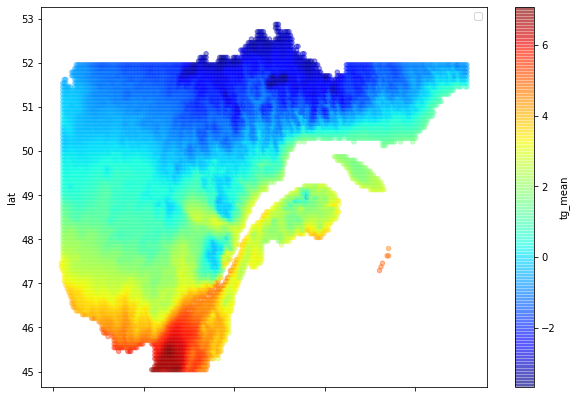

In [18]:
dfTG2.plot(kind="scatter", x="lon", y="lat",
    c="tg_mean", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [19]:
dfTG3 = dfTG2.pivot("lat", "lon", "tg_mean")

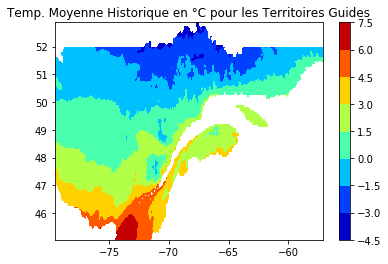

In [20]:
plt.contourf(dfTG3.columns, dfTG3.index, dfTG3.values,
                cmap= "jet")
plt.title("Temp. Moyenne Historique en °C pour les Territoires Guides")
plt.colorbar()
plt.savefig("Tous les TerritoiresMoyenne_Annuel_Hist_Moderees.png")

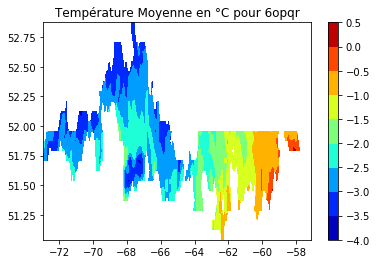

In [32]:
for (TER_GUIDE, df) in dfTG2.groupby("TER_GUIDE"):
    plt.clf()
    #df.plot(kind="scatter", x="lon", y="lat",
    #    c="tg_mean", cmap=plt.get_cmap("jet"),
    #        title = TER_GUIDE,
    #    colorbar=True, alpha=0.4, figsize=(10,7),
    #)
    df2 = df.pivot("lat", "lon", "tg_mean")
    plt.contourf(df2.columns, df2.index, df2.values,
                cmap= "jet")
    plt.title("Température Moyenne en °C pour "+TER_GUIDE)
    plt.colorbar()
    #plt.show()
    plt.savefig(TER_GUIDE+"Moyenne_Annuel_Hist_Moderees.png")

# For Period 2040-2070

In [33]:
df2050.set_index(["lat","lon"])

time    tg_mean
lat       lon                        
40.041039 -89.045212   1.0  13.880927
          -88.961884   1.0  13.860847
          -88.878548   1.0  13.849320
          -88.795219   1.0  13.825986
          -88.711891   1.0  13.843284
...                    ...        ...
66.623306 -61.629639   1.0  -7.526189
          -61.546310   1.0  -7.831767
          -61.462978   1.0  -7.619788
          -61.379650   1.0  -7.545265
          -61.296322   1.0  -6.941467

[76206 rows x 2 columns]

In [34]:
dfTG2050 = pd.merge(df2050, latlon_df, on=["lat","lon"])
dfTG2050

,time,lat,lon,tg_mean,geometry,index_right,TER_GUIDE
0,1.0,45.040840,-74.545792,9.523340,POINT (-74.54579 45.04084),0,1a
1,1.0,45.040840,-74.462463,9.506913,POINT (-74.46246 45.04084),0,1a
2,1.0,45.040840,-74.379128,9.496275,POINT (-74.37913 45.04084),0,1a
3,1.0,45.040840,-74.295799,9.496484,POINT (-74.29580 45.04084),0,1a
4,1.0,45.040840,-74.212471,9.526042,POINT (-74.21247 45.04084),0,1a
...,...,...,...,...,...,...,...
13387,1.0,52.790531,-67.629402,-0.242609,POINT (-67.62940 52.79053),24,6opqr
13388,1.0,52.790531,-67.546066,-0.165015,POINT (-67.54607 52.79053),24,6opqr
13389,1.0,52.873859,-67.712730,-0.389862,POINT (-67.71273 52.87386),24,6opqr
13390,1.0,52.873859,-67.629402,-0.277885,POINT (-67.62940 52.87386),24,6opqr


In [35]:
df2050p = dfTG2050.pivot("lat", "lon", "tg_mean")

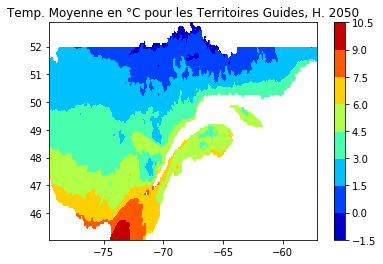

In [36]:
plt.contourf(df2050p.columns, df2050p.index, df2050p.values,
                cmap= "jet")
plt.title("Temp. Moyenne en °C pour les Territoires Guides, H. 2050")

plt.colorbar()
plt.savefig("Tous les TerritoiresMoyenne_Annuel_2050_Moderees.png")

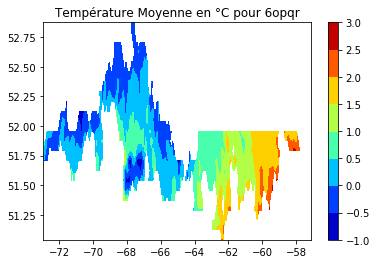

In [37]:
for (TER_GUIDE, df) in dfTG2050.groupby("TER_GUIDE"):
    plt.clf()
    df2 = df.pivot("lat", "lon", "tg_mean")
    plt.contourf(df2.columns, df2.index, df2.values,
                cmap= "jet")
    plt.title("Température Moyenne en °C pour "+TER_GUIDE)
    plt.colorbar()
    #plt.show()
    plt.savefig(TER_GUIDE+"Moyenne_Annuel_2050_Moderees.png")

# For Period 2071-2100

In [38]:
df2080.set_index(["lat","lon"])

time    tg_mean
lat       lon                        
40.041039 -89.045212   2.0  14.543394
          -88.961884   2.0  14.523819
          -88.878548   2.0  14.512645
          -88.795219   2.0  14.490088
          -88.711891   2.0  14.509305
...                    ...        ...
66.623306 -61.629639   2.0  -6.771683
          -61.546310   2.0  -7.084950
          -61.462978   2.0  -6.876992
          -61.379650   2.0  -6.807693
          -61.296322   2.0  -6.205523

[76206 rows x 2 columns]

In [39]:
dfTG2080 = pd.merge(df2080, latlon_df, on=["lat","lon"])
dfTG2080

,time,lat,lon,tg_mean,geometry,index_right,TER_GUIDE
0,2.0,45.040840,-74.545792,10.223314,POINT (-74.54579 45.04084),0,1a
1,2.0,45.040840,-74.462463,10.207400,POINT (-74.46246 45.04084),0,1a
2,2.0,45.040840,-74.379128,10.196888,POINT (-74.37913 45.04084),0,1a
3,2.0,45.040840,-74.295799,10.195649,POINT (-74.29580 45.04084),0,1a
4,2.0,45.040840,-74.212471,10.223697,POINT (-74.21247 45.04084),0,1a
...,...,...,...,...,...,...,...
13387,2.0,52.790531,-67.629402,0.081307,POINT (-67.62940 52.79053),24,6opqr
13388,2.0,52.790531,-67.546066,0.158065,POINT (-67.54607 52.79053),24,6opqr
13389,2.0,52.873859,-67.712730,-0.069011,POINT (-67.71273 52.87386),24,6opqr
13390,2.0,52.873859,-67.629402,0.043007,POINT (-67.62940 52.87386),24,6opqr


In [40]:
df2080p = dfTG2080.pivot("lat", "lon", "tg_mean")

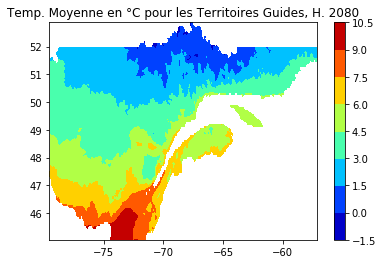

In [41]:
plt.contourf(df2080p.columns, df2080p.index, df2080p.values,
                cmap= "jet")
plt.title("Temp. Moyenne en °C pour les Territoires Guides, H. 2080")

plt.colorbar()
plt.savefig("Tous les TerritoiresMoyenne_Annuel_2080_Moderees.png")

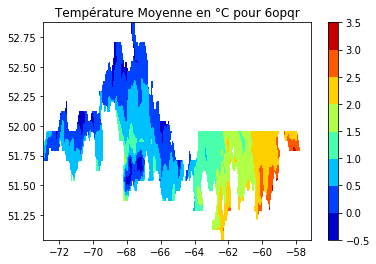

In [42]:
for (TER_GUIDE, df) in dfTG2080.groupby("TER_GUIDE"):
    plt.clf()
    df2 = df.pivot("lat", "lon", "tg_mean")
    plt.contourf(df2.columns, df2.index, df2.values,
                cmap= "jet")
    plt.title("Température Moyenne en °C pour "+TER_GUIDE)
    plt.colorbar()
    #plt.show()
    plt.savefig(TER_GUIDE+"Moyenne_Annuel_2080_Moderees.png")